# Lecture 15 - Monte Carlo Tree Search

provided by [Stanford CS234](https://www.youtube.com/watch?v=FgzM3zpZ55o)

---

<div class="alert alert-block alert-info">
Table of Contents: <br>
    
<ul>
    <li>1. <a href="#1.-Introduction">Introduction</a>
    <li>2. <a href="#2.-Model-Based-RL">Model-Based RL</a>
        <ul>
            <li>2.1. <a href="#2.1.-Table-Lookup-Model">Table Lookup Model</a></li>
            <li>2.2. <a href="#2.2.-Sample-Based-Planning">Sample-Based Planning</a></li>
        </ul>
    </li>
    <li>3. <a href="#3.-Simulation-Based-Search">Simulation-Based Search</a></li>
    <li>4. <a href="#4.-Monte-Carlo-Tree-Search">Monte-Carlo Tree Search</a></li>
    <li>5. <a href="#5.-Resource">Resource</a></li>
</ul>
</div>

# 1. Introduction

As a reminder,

Model-Free RL
* No model
* Learn value function and/or policy from experience

Model-Based RL
* Learn a model from experience (simulator)
* Plan a value function and/or policy from this model

Model-Based RL Pros:
* can learn model via supervised learning methods
* reason about model uncertainty

Model-Based RL Cons:
* need to learn a model to construct a value function (errors can compound)

There are many different approaches to approximating the model:
* table lookup model
* linear expectation model
* linear gaussian model
* gaussian process model
* deep belief network model
* bayesian DNN model
* generally, anything deep learning related

# 2. Model-Based RL

## 2.1. Table Lookup Model

The __Table Lookup model__ is the simplest approach to approximating the transition model and the reward function.

$$
\hat{P}_{s, s'}^{a} = \frac{1}{N(s, a)} \sum_{t = 1}^{T} \mathbb{1}(S_{t}, A_{t}, S_{t + 1} = s, a, s') \hspace{1em} (Eq.~1)\\
\hat{R}_{s}^{a} = \frac{1}{N(s, a)} \sum_{t = 1}^{T} \mathbb{1}(S_{t}, A_{t} = s, a) r_{t} \hspace{1em} (Eq.~2)\\
$$

The table lookup model decomposes into 2 parts:
* transition model
    * for every state-action (next state) pair, average the number of times seen
* reward model
    * average the reward you get from a certain state and action pair

## 2.2. Sample-Based Planning

This section doesn't introduce another model approach but simply answers: how do we fit this model into our RL feedback loop?

1. approximate the model 
2. sample experience from the model
3. apply model-free RL to the sampled data
    * MC/SARSA/Q-learning
    
Naturally, there arises issues. Your pipeline is only as good as the model approximation. If it is wrong, you can tackle it via 2 ways: apply model-free RL to just the environment itself (skip model approximation entirely) or reason about the model uncertainty.

# 3. Simulation-Based Search

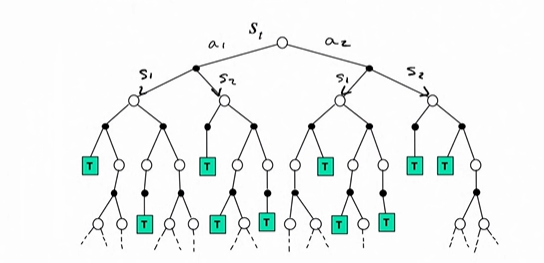 <br>
_Figure 1. Search Tree._

For a given state $s_{t}$, we can build a search tree using the approximate transition and reward models. To compute the value at the root node ($s_{t}$), traverse downward, taking the action that maximizes reward and the expected state. This is the same search tree from Lecture 3.

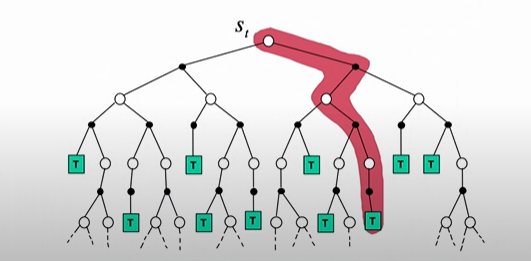 <br>
_Figure 2. Search Tree Path._

We can simulate episodes of experience from this search tree and apply model-free RL algorithms to our collected data.

Given a model $M_{v}$ and a __simulation policy__ $\pi$ <br>
For each action $a \in A$ <br>
$\quad$ Simulate $K$ episodes from current state $s_{t}$ <br>
$\quad$ Evaluate actions by mean return (MC eval) <br>
$$
Q(s_{t}, a) = \frac{1}{K} \sum_{k = 1}^{K} G_{t} \overset{P}{\rightarrow} q_{\pi}(s_{t}, a)
$$
$\quad$ Select current action with maximum value <br>
$$
a_{t} = \underset{a \in A}{argmax} Q(s_{t}, a)
$$

_Algorithm 1. Simple Monte-Carlo Search Pipeline._

# 4. Monte-Carlo Tree Search

Given a model $M_{v}$ <br>
Build a search tree rooted in current state $s_{t}$ <br>
Sample actions and next states <br>
Iteratively construct and update tree by performing $K$ simulation episodes starting from root state <br>
After search is finished, select current action with maximum value in search tree 

$$
a_{t} = \underset{a \in A}{argmax} Q(s_{t}, a)
$$

From what I'm understanding, this Monte-Carlo Tree Search (MCTS) algorithm uses a model approximation of the environment (transition and reward) to create a policy that can act optimally in it. If that's right, then MCTS is a value-based, model-based RL algorithm with an implicit policy.

How do we simulate an episode?

There are 2 scenarios:
* __in-tree__
    * for states and actions that we have thoroughly explored we can pick an action to maximize $Q(s, a)$ (__tree policy__)
* __out-of-tree__
    * for states and actions we haven't thoroughly explored, we can pick actions randomly or act via another policy (__rollout policy__)
    
$$
Q(i) = \frac{1}{N(i)} \sum_{k = 1}^{K}\sum_{u = t}^{T} \mathbb{1}(i \in epi.~k) G_{k}(i) \overset{P}{\rightarrow} q(s, a) \hspace{1em} (Eq.~3)\\
$$

Eq. 3 evaluates the value of a tree node $i$ at state-action pair $s, a$. In short here is what it means:
> average the rewards received across all episodes from that node onwards (till horizon or terminal state) 

Okay, but how do we select an action during a simulated episode? 

There are many ways to do this, but one common method is called __Upper Confidence Tree (UCT)__. It treats each state note as a multi-armed bandit problem and applies logic from the UCB algorithm.

$$
Q(s, a, i) = \frac{1}{N(s, a, i)} \sum_{k = 1}^{K}\sum_{u = t}^{T} \mathbb{1}(i \in epi.~k) G_{k}(s, a, i) + c\sqrt{\frac{ln(n(s))}{n(s, a)}} \hspace{1em} (Eq.~4)\\
$$

Eq. 3 evaluates a node $i$ with state-action pair $s, a$. Eq. 4 is the UCT equation for selecting an action in a simulated episode.

MCTS has a lot of advantages:
* best-first search
* evaluates states dynamically
* computationally tractable

# 5. Resource

If you missed the link right below the title, I'm providing the resource here again along with the course website.

- [Stanford CS234](https://www.youtube.com/watch?v=FgzM3zpZ55o)
- [Course Website](http://web.stanford.edu/class/cs234/index.html)

This is a series of 15 lectures provided by Stanford.
